## 文本摘要综述（三）之论文笔记
>1、 [Ranking with Recursive Neural Networks and
Its Application to Multi-Document Summarization](https://www.aaai.org/ocs/index.php/AAAI/AAAI15/paper/download/9414/9520)

> 2、实验室面试的时候讲的就是这篇文章，当时的[ppt](链接：https://pan.baidu.com/s/1DPVGcaZ-FG2il9n3cXFHWw); (密码：8fgd)

> 3、[recursive neural network](https://blog.csdn.net/aliceyangxi1987/article/details/71055237)

本篇文章提出了一种模型，作者命名为R2N2（其实就是recursive neural network的改进）,模型思路主要分为两部分：sentence ranking和sentence selection。数据集是DUC2001，2002和2004.

### 1.1 A Example  of R2N2
![1](https://github.com/stuian/text-summarization/blob/master/pictures/3/1.jpg?raw=true)
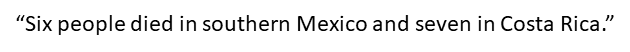

用作者提到的模型可以把上面这个句子构造出一棵语法树。（图中:NP为名词短语，等等）

### 1.2 Recursive neural network和Recurrent neural network的区别
> 在说R2N2这个模型之前，先了解一下这两个network的区别

![recursive](http://upload-images.jianshu.io/upload_images/1667471-0751851caf61250b.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

> 前一个是Recursive neural network，后一个是Recurrent neural network

Recursive NN 可以返回树上每个节点的向量表达，Recurrent NN 在任何时候返回一句话的向量。

### 1.3 Sentence Ranking
#### 1.3.1 Recursive neural network(RNN)
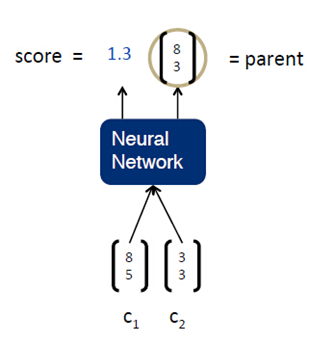
> 该图不是论文中的，只是用来解释Recursive neural network是如何工作的。

计算两个子节点的父节点的向量表征：![2](https://github.com/stuian/text-summarization/blob/master/pictures/3/2.jpg?raw=true)
> 其中at是激活函数，论文里使用的是hardTanh，l(c1)和l(c2)分别代表子节点，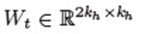

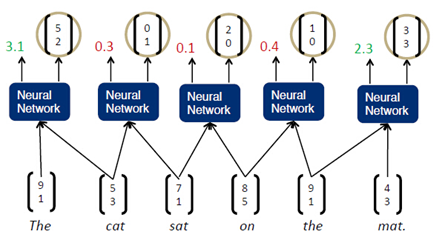

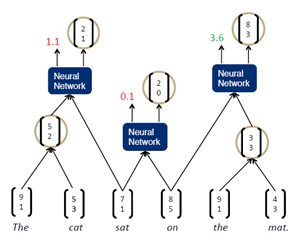

除了叶子节点（即末端节点，最下面那一排）不用计算score，其他每个节点在得出向量表征后还要求得该节点的一个分数。
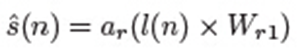

其中：


ar也是激活函数，论文里采用的是sigmond,使得得分的范围落在0到1之间。

语法树建成后，可以得到每一个非终端节点的分数，最终一个句子的分数即为所有节点的分数的和。

#### 1.3.2 R2N2
以上是RNN的基本思想，R2N2是在该模型的基础上进行的改进。

整体流程和ENN相似：

**正向传播的过程**

从输入的向量两两结合，依次计算出一个分数，选取最大的分数的两个节点结合形成父节点（并得出父节点的向量表征），依次递归，最终得到一个句子的语法树的结构。

**反向传播**

在预处理的时候用Stanford CoreNLP将句子转换成语法树，再用ROUGE-1和ROUGE-2的方法求出每个非终端节点的分数S(n)。
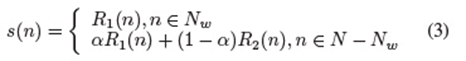

> N = {n}是非终端节点，Nw是pre-terminal节点（即终端节点之前的那一排节点），α=0.5.

** 损失函数**

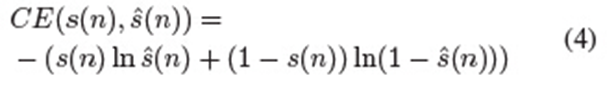

> 采用交叉熵

**R2N2做出的一点改进**

1、人工添加的一些词语和句子的特征提高了模型的效果
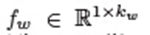

> word features

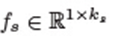

> sentence features

2、添加一层映射，转换维度：

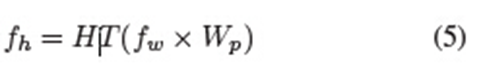

其中：


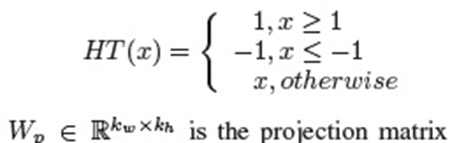

> 最终fh作为模型R2N2的输入

3、增加了word feature和sentence feature，分数计算也有所改变：
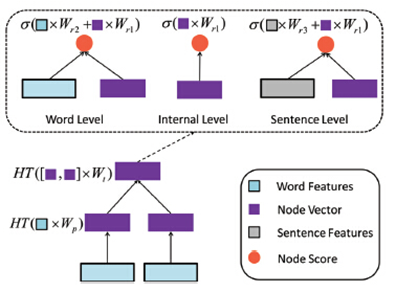

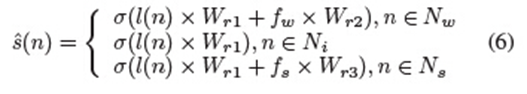

> Nw is the set of pre-terminal (linked to words) nodes, Ns represents the set of root nodes (linked to sentences) and Ni the set of the rest internal nodes.

上面的图最终体现了论文的中心思想：分层。

图的意思是：

- 终端节点：在原来计算的基础上加上
- 根节点：在原来计算的基础上加上
- 其他的节点同原来一样

### 1.4 Sentence Selection

文章中提到了两种方法:

- greedy alg0rithm
- integer linear programming

> 论文中并没有解释的很详细..